# Домашняя работа №1

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Регрессия-с-SVM-(3-балла)" data-toc-modified-id="Регрессия-с-SVM-(3-балла)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Регрессия с SVM (3 балла)</a></div><div class="lev2 toc-item"><a href="#Визуализация-данных-(1-балл)" data-toc-modified-id="Визуализация-данных-(1-балл)-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визуализация данных (1 балл)</a></div><div class="lev2 toc-item"><a href="#Обучение-моделей-(2-балла)" data-toc-modified-id="Обучение-моделей-(2-балла)-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обучение моделей (2 балла)</a></div><div class="lev1 toc-item"><a href="#Определение-языка-слова-(7-баллов)" data-toc-modified-id="Определение-языка-слова-(7-баллов)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Определение языка слова (7 баллов)</a></div><div class="lev2 toc-item"><a href="#Загрузка-(1-балл)" data-toc-modified-id="Загрузка-(1-балл)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка (1 балл)</a></div><div class="lev2 toc-item"><a href="#Подход-с-n-граммами-(2-балла)" data-toc-modified-id="Подход-с-n-граммами-(2-балла)-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Подход с n-граммами (2 балла)</a></div><div class="lev2 toc-item"><a href="#Подход-с-пользовательским-ядром" data-toc-modified-id="Подход-с-пользовательским-ядром-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Подход с пользовательским ядром</a></div><div class="lev3 toc-item"><a href="#Подготовка-данных-(1-балла)" data-toc-modified-id="Подготовка-данных-(1-балла)-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подготовка данных (1 балла)</a></div><div class="lev3 toc-item"><a href="#Расчет-ядра-(2-балла)" data-toc-modified-id="Расчет-ядра-(2-балла)-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Расчет ядра (2 балла)</a></div><div class="lev3 toc-item"><a href="#Оценка-качества-(1-балл)" data-toc-modified-id="Оценка-качества-(1-балл)-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Оценка качества (1 балл)</a></div>

# Регрессия с SVM (3 балла)

SVM можно использовать и для задачи регрессии.

Загрузите набор данных из *titanium.csv*<br/>
Будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (вычет среднего и деление на стандартное отклонение) и выведите их на графике.

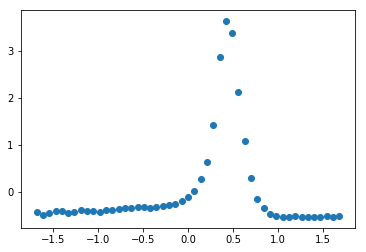

In [58]:
import pandas as pd
import numpy as np

ddf = pd.read_csv('titanium.csv')
mean = ddf.mean()
std = ddf.std()
df = (ddf - mean) / std

X = np.array(df['x'] - df['x'].mean())/df['x'] .std()
y = np.array(df['y'] - df['y'].mean())/df['y'].std()
X = X.reshape((49, 1))
y = y.reshape((49, 1))

import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

## Обучение моделей (2 балла)

Рассмотрим 3 ядра: 
* Линейное
* Полиномиальное (`degree = 3`, `gamma = 6`, `coef0 = 1`)
* RBF (`gamma = 6`, `coef0 = 1`)

Во всех случаях установите точность алгоритма оптимизации `epsilon=0.01`

Для каждого из ядер:
1. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наилучшего параметра $C$ постройте график с данными и предсказанием с помощью SVM.

В каких случаях возникают эффекты недообучения, переобучения?

https://stackoverflow.com/questions/773814/plot-logarithmic-axes-with-matplotlib-in-python

In [59]:
from sklearn import svm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

Зададим гипер-параметр С произвольно:

In [4]:
C_range = np.logspace(-3, 8, num=20, base=7.0)
hyperC = {'C':C_range}

In [5]:
makescorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Линейное:

http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py

Если С=1:

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


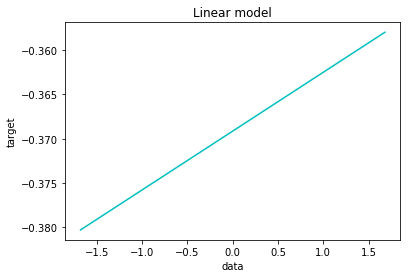

In [6]:
from sklearn.svm import LinearSVR
regr = LinearSVR(epsilon = 0.01)
y_lin = regr.fit(X, y).predict(X)
plt.plot(X, y_lin, color='c')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Linear model')
plt.show()

In [35]:
y_true = y
y_pred = y_lin
mae_lin = mean_absolute_error(y_true, y_pred)
mae_lin

0.47099138144605207

Теперь построим график зависимоси разных параметров С от ошибки:

In [8]:
svr_lin_grid = GridSearchCV(SVR (kernel = 'linear', epsilon = 0.01), hyperC, scoring=makescorer)
svr_lin_grid.fit(X, y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  2.91545e-03,   8.99442e-03,   2.77486e-02,   8.56067e-02,
         2.64104e-01,   8.14784e-01,   2.51368e+00,   7.75491e+00,
         2.39246e+01,   7.38094e+01,   2.27708e+02,   7.02500e+02,
         2.16727e+03,   6.68622e+03,   2.06276e+04,   6.36378e+04,
         1.96328e+05,   6.05689e+05,   1.86860e+06,   5.76480e+06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_absolute_error, greater_is_better=False),
       verbose=0)

In [10]:
svr_lin_grid.best_params_

{'C': 0.0029154518950437317}

In [30]:
svr_lin_grid.best_index_

0

In [32]:
C_lin_best = C_range[svr_lin_grid.best_index_]
C_lin_best

0.0029154518950437317

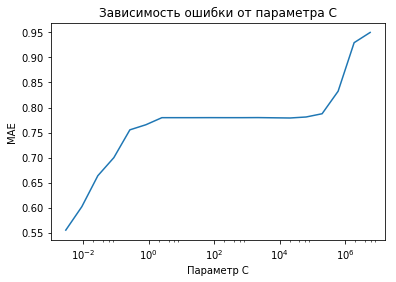

In [36]:
plt.plot(C_range, -svr_lin_grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('Параметр С')
plt.ylabel('МАЕ')
plt.title('Зависимость ошибки от параметра С')
plt.show()

Используя найденный лучший параметр С, построим график с данными и предсказанием:

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


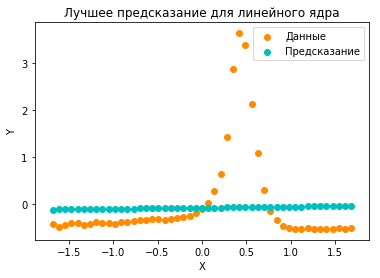

In [65]:
lin_best = LinearSVR(epsilon = 0.01, C = C_lin_best)
y_lin_best = lin_best.fit(X, y).predict(X)

plt.figure()
plt.scatter(X, y, label = "Данные", color='darkorange')
plt.scatter(X, y_lin_best, label ="Предсказание", color='c')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Лучшее предсказание для линейного ядра')
plt.legend()
plt.show()

# Полиномиальное:

Если С = 1:

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


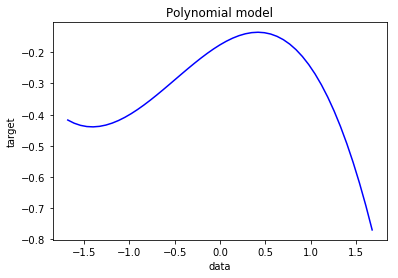

In [13]:
svr_poly = SVR(kernel='poly', degree = 3, gamma = 6, coef0 = 1, epsilon = 0.01)
y_poly = svr_poly.fit(X, y).predict(X)
plt.plot(X, y_poly, color='b')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Polynomial model')
plt.show()

In [39]:
mae_poly = mean_absolute_error(y_true, y_poly)
mae_poly

0.41058953101301576

Теперь построим график зависимоси разных параметров С от ошибки:

In [43]:
svr_poly_grid = GridSearchCV(SVR (kernel = 'poly', degree = 3, gamma = 6, coef0 = 1, epsilon = 0.01), hyperC, scoring=makescorer)
svr_poly_grid.fit(X, y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=1, degree=3, epsilon=0.01, gamma=6,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  2.91545e-03,   8.99442e-03,   2.77486e-02,   8.56067e-02,
         2.64104e-01,   8.14784e-01,   2.51368e+00,   7.75491e+00,
         2.39246e+01,   7.38094e+01,   2.27708e+02,   7.02500e+02,
         2.16727e+03,   6.68622e+03,   2.06276e+04,   6.36378e+04,
         1.96328e+05,   6.05689e+05,   1.86860e+06,   5.76480e+06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_absolute_error, greater_is_better=False),
       verbose=0)

In [47]:
svr_poly_grid.best_params_

{'C': 0.0029154518950437317}

In [48]:
svr_poly_grid.best_index_

0

In [54]:
C_poly_best = C_range[svr_poly_grid.best_index_]
C_poly_best

0.0029154518950437317

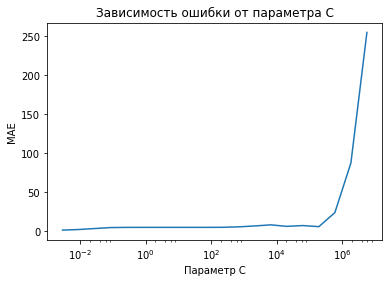

In [50]:
plt.plot(C_range, -svr_poly_grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('Параметр С')
plt.ylabel('МАЕ')
plt.title('Зависимость ошибки от параметра С')
plt.show()

Используя найденный лучший параметр С, построим график с данными и предсказанием:

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


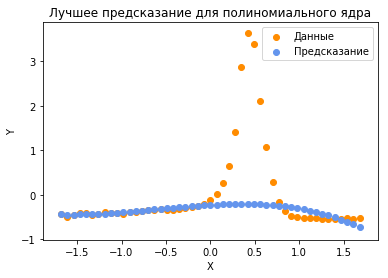

In [64]:
poly_best = SVR(kernel='poly', degree = 3, gamma = 6, coef0 = 1, epsilon = 0.01, C = C_poly_best)
y_poly_best = poly_best.fit(X, y).predict(X)

plt.figure()
plt.scatter(X, y, label = "Данные", color='darkorange')
plt.scatter(X, y_poly_best, label ="Предсказание", color='cornflowerblue')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Лучшее предсказание для полиномиального ядра')
plt.legend()
plt.show()

# RBF:

Если С = 1:

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


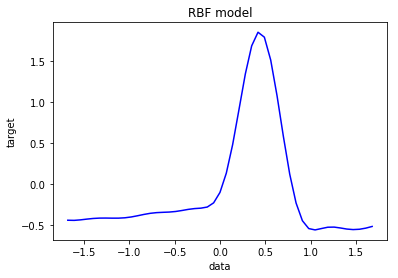

In [19]:
svr_rbf = SVR(kernel='rbf', gamma = 6, coef0 = 1, epsilon = 0.01)
y_rbf = svr_rbf.fit(X, y).predict(X)
plt.plot(X, y_rbf, color='b')
plt.xlabel('data')
plt.ylabel('target')
plt.title('RBF model')
plt.show()

In [53]:
mae_rbf = mean_absolute_error(y_true, y_rbf)
mae_rbf

0.14514248537378324

Теперь построим график зависимоси разных параметров С от ошибки:

In [44]:
svr_rbf_grid = GridSearchCV(SVR (kernel = 'rbf', gamma = 6, coef0 = 1, epsilon = 0.01), hyperC, scoring=makescorer)
svr_rbf_grid.fit(X, y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=1, degree=3, epsilon=0.01, gamma=6,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  2.91545e-03,   8.99442e-03,   2.77486e-02,   8.56067e-02,
         2.64104e-01,   8.14784e-01,   2.51368e+00,   7.75491e+00,
         2.39246e+01,   7.38094e+01,   2.27708e+02,   7.02500e+02,
         2.16727e+03,   6.68622e+03,   2.06276e+04,   6.36378e+04,
         1.96328e+05,   6.05689e+05,   1.86860e+06,   5.76480e+06])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_absolute_error, greater_is_better=False),
       verbose=0)

In [45]:
svr_rbf_grid.best_params_

{'C': 23.924571634609386}

In [55]:
svr_rbf_grid.best_index_

8

In [56]:
C_rbf_best = C_range[svr_rbf_grid.best_index_]
C_rbf_best

23.924571634609386

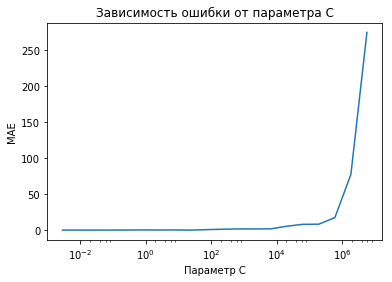

In [58]:
plt.plot(C_range, -svr_rbf_grid.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('Параметр С')
plt.ylabel('МАЕ')
plt.title('Зависимость ошибки от параметра С')
plt.show()

Используя найденный лучший параметр С, построим график с данными и предсказанием:

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


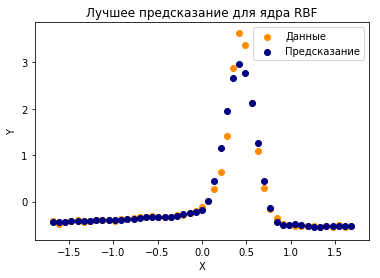

In [63]:
rbf_best = SVR(kernel='poly', degree = 3, gamma = 6, coef0 = 1, epsilon = 0.01, C = C_poly_best)
y_poly_best = poly_best.fit(X, y).predict(X)

rbf_best = SVR(kernel='rbf', gamma = 6, coef0 = 1, epsilon = 0.01, C = C_rbf_best)
y_rbf_best = rbf_best.fit(X, y).predict(X)

plt.figure()
plt.scatter(X, y, label = "Данные", color='darkorange')
plt.scatter(X, y_rbf_best, label ="Предсказание", color='navy')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Лучшее предсказание для ядра RBF')
plt.legend()
plt.show()

Общая картина при С = 1:

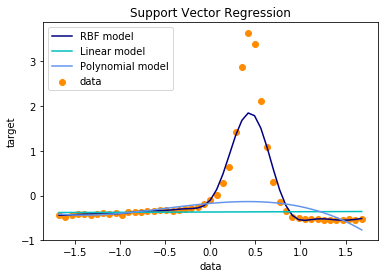

In [61]:
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', label='RBF model')
plt.plot(X, y_lin, color='c', label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Если С - лучший выбранный параметр, то:

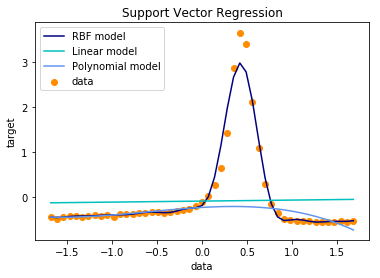

In [62]:
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf_best, color='navy', label='RBF model')
plt.plot(X, y_lin_best, color='c', label='Linear model')
plt.plot(X, y_poly_best, color='cornflowerblue', label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [70]:
print('Лучшее С для линейного ядра:', C_lin_best)
print('Лучшее С для полиномиального ядра:', C_poly_best)
print('Лучшее С для ядра RBF:', C_rbf_best)

Лучшее С для линейного ядра: 0.00291545189504
Лучшее С для полиномиального ядра: 0.00291545189504
Лучшее С для ядра RBF: 23.9245716346


Эффект недообучения возникает при маленьком С, переобучения - при большом.
В нашем случае лучшее предсказание получилось при использовании полиномиального ядра.

# Определение языка слова (7 баллов)

В данном задании вам необходимо построить модель, которая будет определять, на каком языке написано слово. Сделать это будет предложено двумя способами.

Даны два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова.

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [60]:
import pandas as pd
es = pd.read_csv('war_and_peace_es.txt', header=None, names=['word'])
en = pd.read_csv('war_and_peace_en.txt', header=None, names=['word'])
es['label'] = 0
en['label'] = 1
datax = [es, en]
data = pd.concat(datax)
data.head()

,word,label
0,guerra,0
1,pace,0
2,lev,0
3,nicoevic,0
4,tolstj,0


## Подход с n-граммами (2 балла)

На этом этапе предлагается построить модель используя n-граммы слов, то есть последовательностях из n символов.<br/>
Таким образом, признаками наших данных будут все найденные n-граммы слов, а значениями признаков будут частоты соответствующих n-грамм в слове.<br/>
Например, для слова "guerra" би-граммами будут "gu", "ue", "er", "rr", "ra", каждая из которых встречается в нем с частотой 1.

Для того, чтобы выделять n-граммы, удобно использовать `CountVectorizer()` с аргументами `analyzer='char'` и `ngram_range=(n_min, n_max)`. Вы наверняка встречались с этим векторизатором в предыдущем модуле.

Таким образом, сделайте следующее:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Разбейте данные на обучающую и отложенную выборку в пропорции 80/20
3. Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html), состоящий из `CountVectorizer()` и SVM с линейным ядром
4. Исследуйте, как влияют размер n-грамм и величина штрафа `C` на предсказательную силу модели. Мера качества - accuracy.

Шаг 1: Зададим random_seed

In [47]:
RND_SEED = 37

Шаг 2: Разобьем данные на выборки нужного размера

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as accuracy
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['word'], data['label'], test_size=0.2, random_state=RND_SEED)

Шаг 3: Составим pipeline

In [10]:
from sklearn.svm import SVC
count_vectorizer = CountVectorizer(analyzer='char')
svc_lin = SVC(kernel='linear')
pipeline = Pipeline([('vectorizer', count_vectorizer), ('svc', svc_lin)])

Шаг 4: Cоставим 9 pipeline, посмотрим как изменяется показатель accuracy в зависимости от значений С и ngram

In [17]:
pipeline1 = pipeline.set_params(svc__C = 3, vectorizer__ngram_range = (2,3))
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 3), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [19]:
a1 = accuracy(y_test, pipeline1.predict(X_test))
a1

0.941253836036826

In [22]:
pipeline2 = pipeline.set_params(svc__C = 3, vectorizer__ngram_range = (4,5))
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(4, 5), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [23]:
a2 = accuracy(y_test, pipeline2.predict(X_test))
a2

0.80096448925909691

In [24]:
pipeline3 = pipeline.set_params(svc__C = 3, vectorizer__ngram_range = (7,9))
pipeline3.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(7, 9), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [25]:
a3 = accuracy(y_test, pipeline3.predict(X_test))
a3

0.62691801841297679

In [26]:
pipeline4 = pipeline.set_params(svc__C = 10, vectorizer__ngram_range = (2,2))
pipeline4.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [28]:
a4 = accuracy(y_test, pipeline4.predict(X_test))
a4

0.90135905304690922

In [29]:
pipeline5 = pipeline.set_params(svc__C = 15, vectorizer__ngram_range = (2,2))
pipeline5.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [30]:
a5 = accuracy(y_test, pipeline5.predict(X_test))
a5

0.90442788250767203

In [31]:
pipeline6 = pipeline.set_params(svc__C = 25, vectorizer__ngram_range = (2,2))
pipeline6.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 2), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [32]:
a6 = accuracy(y_test, pipeline6.predict(X_test))
a6

0.90398947829899168

In [33]:
pipeline7 = pipeline.set_params(svc__C = 21, vectorizer__ngram_range = (5,5))
pipeline7.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(5, 5), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [38]:
a7 = accuracy(y_test, pipeline7.predict(X_test))
a7

0.62735642262165714

In [35]:
pipeline8 = pipeline.set_params(svc__C = 17, vectorizer__ngram_range = (4,9))
pipeline8.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(4, 9), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [39]:
a8 = accuracy(y_test, pipeline8.predict(X_test))
a8

0.62735642262165714

In [37]:
pipeline9 = pipeline.set_params(svc__C = 4, vectorizer__ngram_range = (7,8))
pipeline9.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(7, 8), preprocessor=None, stop_words=None,
       ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [41]:
a9 = accuracy(y_test, pipeline9.predict(X_test))
a9

0.62735642262165714

## Подход с пользовательским ядром
### Подготовка данных (1 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно может принимать на вход **только** вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы `df.sample()` и `df.reset_index()`)
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 80/20

В результате вы должны получить вектор-столбец `X_train`, `X_test` с **индексами** слов и векторы `y_train`, `y_test` с метками классов.

Шаг 1: Зададим random_seed

In [61]:
RND_SEED = 37

Шаг 2: Перемешаем и проиндексируем таблицу

In [62]:
data = data.sample(frac=1).reset_index(drop=True)
X = data['word']
y = data['label']

Шаг 3: Обрежем таблицу, оставив 2001 слово

In [63]:
len(data)

11403

In [64]:
data.drop(range(2001, 11403), axis=0, inplace=True)

In [65]:
len(data)

2001

Шаг 4: Разобьем данные на выборки нужного размера

In [66]:
from sklearn.model_selection import StratifiedShuffleSplit

X = data['word']
y = data['label']


spli = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RND_SEED)

for train_index, test_index in spli.split(X, y):
    X_train = train_index
    X_test = test_index
    y_train = train_index
    y_test = test_index

### Расчет ядра (2 балла)

Теперь напишем собственное ядро для классификации строк. Для сравнения строк будем использовать [расстояние Левенштейна](https://ru.wikipedia.org/wiki/Расстояние_Левенштейна). Реализацию этого расстояния можно получить одним из двух способов:
* скопировать функцию wfi_levenshtein из файла [pylev.py](https://github.com/toastdriven/pylev/blob/master/pylev.py)
* поставить пакет [editdistance](https://pypi.python.org/pypi/editdistance) (будет работать быстрее, чем предыдущая реализация, но могут возникнуть проблемы с установкой)

Ядро для сравнения строк должно принимать максимальное значение, когда слова одинаковы, и минимальное, когда очень отличаются. Это противоположно свойствам расстояния Левенштейна: оно равно 0, когда слова одинаковы, и максимально, когда слова разные. Поэтому подставьте значение расстояния Левенштейна в какое-нибудь ядро, зависящее от расстояния между объектами (например, гауссовское).

Функция, реализующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во время обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).
Функция должна возвращать матрицу значений ядра для всех объектов попарно: $G_{ij} = K(U_i, V_j)$. Здесь $U_i$ — i-ый объект выборки $U$, а $V_j$ — j-ый объект выборки $V$.

Сделайте следующее:
1. Напишите функцию *string_kernel(U, V)*, расчитывающую матрицу ядра $G_{ij}$
2. Визуализируйте матрицу только для тренировочной выборки (функция plt.imshow()).


In [67]:
def wfi_levenshtein(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    This version uses an iterative version of the Wagner-Fischer algorithm.
    Usage::
        >>> wfi_levenshtein('kitten', 'sitting')
        3
        >>> wfi_levenshtein('kitten', 'kitten')
        0
        >>> wfi_levenshtein('', '')
        0
    """
    if string_1 == string_2:
        return 0

    len_1 = len(string_1)
    len_2 = len(string_2)

    if len_1 == 0:
        return len_2
    if len_2 == 0:
        return len_1

    if len_1 > len_2:
        string_2, string_1 = string_1, string_2
        len_2, len_1 = len_1, len_2

    d0 = [i for i in range(len_2 + 1)]
    d1 = [j for j in range(len_2 + 1)]

    for i in range(len_1):
        d1[0] = i + 1
        for j in range(len_2):
            cost = d0[j]

            if string_1[i] != string_2[j]:
                # substitution
                cost += 1

                # insertion
                x_cost = d1[j] + 1
                if x_cost < cost:
                    cost = x_cost

                # deletion
                y_cost = d0[j + 1] + 1
                if y_cost < cost:
                    cost = y_cost

            d1[j + 1] = cost

        d0, d1 = d1, d0

    return d0[-1]

In [68]:
def string_kernel(U, V):
    yad = np.zeros([len(U), len(V)])
    for i in range(len(U)):
        if i % 25 == 0:
            print(i)  
        for j in range(len(V)):
            yad[i][j] = wfi_levenshtein(X[int(U[i])], X[int(V[j])])
    fin = np.zeros([len(U), len(V)])
    for i in range(len(U)):
        for j in range(len(V)):
            fin[i][j] = np.exp(-yad[i][j] / 2.0)
    return fin

In [69]:
import numpy as np
train_kernel = string_kernel(X_train, X_train)

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875
900
925
950
975
1000
1025
1050
1075
1100
1125
1150
1175
1200
1225
1250
1275
1300
1325
1350
1375
1400
1425
1450
1475
1500
1525
1550
1575


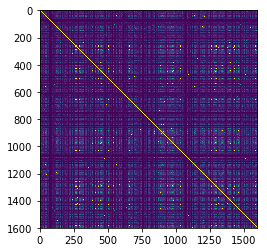

In [70]:
import matplotlib.pyplot as plt
plt.imshow(train_kernel)
plt.show()

### Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке. Для улучшения качества можно увеличить размер тренировочной выборки. Но тогда обучение будет происходить дольше.

In [71]:
from sklearn.svm import SVC
svc_string = SVC(kernel=string_kernel, cache_size=4000)
svc_string.fit(X_train.reshape(-1,1), y_train)

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
675
700
725
750
775
800
825
850
875
900
925
950
975
1000
1025
1050
1075
1100
1125
1150
1175
1200
1225
1250
1275
1300
1325
1350
1375
1400
1425
1450
1475
1500
1525
1550
1575


SVC(C=1.0, cache_size=4000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel=<function string_kernel at 0x000000874C8860D0>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [72]:
from sklearn.metrics import accuracy_score as accuracy
accuracy(y_test, svc_string.predict(X_test.reshape(-1, 1)))

0
25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400


0.0